<a href="https://colab.research.google.com/github/moyaa05/PracticasAprendizajeAutomatico/blob/PR4/PR4/eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Celda 1: Instalación y Conexión
Instalamos YOLO y conectamos el Drive.

In [1]:
# 1. INSTALACIÓN Y CONEXIÓN
print("--- Instalando Ultralytics ---")
%pip install ultralytics -q

import ultralytics
from ultralytics import YOLO
import os
import shutil
from google.colab import drive
from IPython.display import Image, display

# Montamos el Drive
print("\n--- Conectando con Google Drive ---")
drive.mount('/content/drive')

# Rutas
DRIVE_FOLDER = '/content/drive/MyDrive/Practica_ISIC'
DATA_ZIP = 'dataset_ISIC.zip'
MODELS_ZIP = 'modelos_entrenados.zip'

--- Instalando Ultralytics ---
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

--- Conectando con Google Drive ---
Mounted at /content/drive


# Celda 2: Carga de Recursos (Datos y Modelos)
Aquí recuperamos ambos ZIPs: las imágenes para hacer el examen y los modelos entrenados para ser examinados.

In [2]:
# 2. CARGA DE RECURSOS
print("--- Recuperando materiales del almacén (Drive) ---")

# 1. Traemos y descomprimimos el Dataset
if not os.path.exists('dataset'):
    print(f"Copiando y descomprimiendo {DATA_ZIP}...")
    shutil.copy(os.path.join(DRIVE_FOLDER, DATA_ZIP), '/content/')
    !unzip -q {DATA_ZIP}
else:
    print("Dataset ya presente.")

# 2. Traemos y descomprimimos los Modelos Entrenados
if not os.path.exists('ISIC_Project'):
    print(f"Copiando y descomprimiendo {MODELS_ZIP}...")
    shutil.copy(os.path.join(DRIVE_FOLDER, MODELS_ZIP), '/content/')
    !unzip -q {MODELS_ZIP}
else:
    print("Modelos ya presentes.")

print("\n Todo listo: Tenemos las imágenes y los cerebros entrenados.")

--- Recuperando materiales del almacén (Drive) ---
Copiando y descomprimiendo dataset_ISIC.zip...
Copiando y descomprimiendo modelos_entrenados.zip...

 Todo listo: Tenemos las imágenes y los cerebros entrenados.


# Celda 3: Bucle de Evaluación
Itera por los tres modelos (n, s, m), carga sus mejores pesos (best.pt) y ejecuta la validación sobre el conjunto de test.

YOLO guardará automáticamente las matrices de confusión en carpetas nuevas.

In [3]:
# 3. EVALUACIÓN DE MODELOS
print("--- Iniciando Evaluación Médica ---")

# Lista de modelos a evaluar
model_names = ['yolov8n_run', 'yolov8s_run', 'yolov8m_run']
base_model_path = 'ISIC_Project'

# Carpeta donde guardaremos los resultados de la evaluación
eval_project = 'ISIC_Evaluation'

metrics_summary = {}

for run_name in model_names:
    print(f"\n Evaluando: {run_name}...")

    # Construimos la ruta al archivo de pesos
    # Estructura: ISIC_Project/yolov8n_run/weights/best.pt
    weights_path = os.path.join(base_model_path, run_name, 'weights', 'best.pt')

    if os.path.exists(weights_path):
        # Cargamos el modelo
        model = YOLO(weights_path)

        # Ejecutamos validación sobre el set de TEST
        # split='test',para usar las imágenes que reservamos
        metrics = model.val(data='dataset',
                          split='test',
                          project=eval_project,
                          name=run_name)

        # Guardamos la precisión top-1 para tener referencia rápida
        acc = metrics.top1
        metrics_summary[run_name] = acc
        print(f"   -> Top-1 Accuracy: {acc:.2%}")

    else:
        print(f" Error: No se encuentra {weights_path}")

print("\nResumen Rápido de Exactitud (Accuracy):")
for m, acc in metrics_summary.items():
    print(f"{m}: {acc:.2%}")

--- Iniciando Evaluación Médica ---

 Evaluando: yolov8n_run...
Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,445,128 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/train... found 800 images in 8 classes ✅ 
val: None...
test: /content/dataset/test... found 80 images in 8 classes ✅ 
test: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2835.2±1005.2 MB/s, size: 419.6 KB)
test: Scanning /content/dataset/test... 80 images, 0 corrupt: 100% ━━━━━━━━━━━━ 80/80 1.7Kit/s 0.0s
test: New cache created: /content/dataset/test.cache
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 5/5 9.5it/s 0.5s
                   all      0.663      0.975
Speed: 1.0ms preprocess, 3.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/ISIC_Evaluation/yolov8n_run
   -> Top-1 Accuracy: 66.25%

 Evaluando: yolov8s_run...
Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tes

# Celda 4: Visualización de Resultados
Vamos a mostrar aquí mismo las Matrices de Confusión que YOLO ha generado. Así podremos ver rápidamente si el modelo está confundiendo enfermedades.

--- Visualización de Resultados ---

Matriz de Confusión para yolov8n_run:


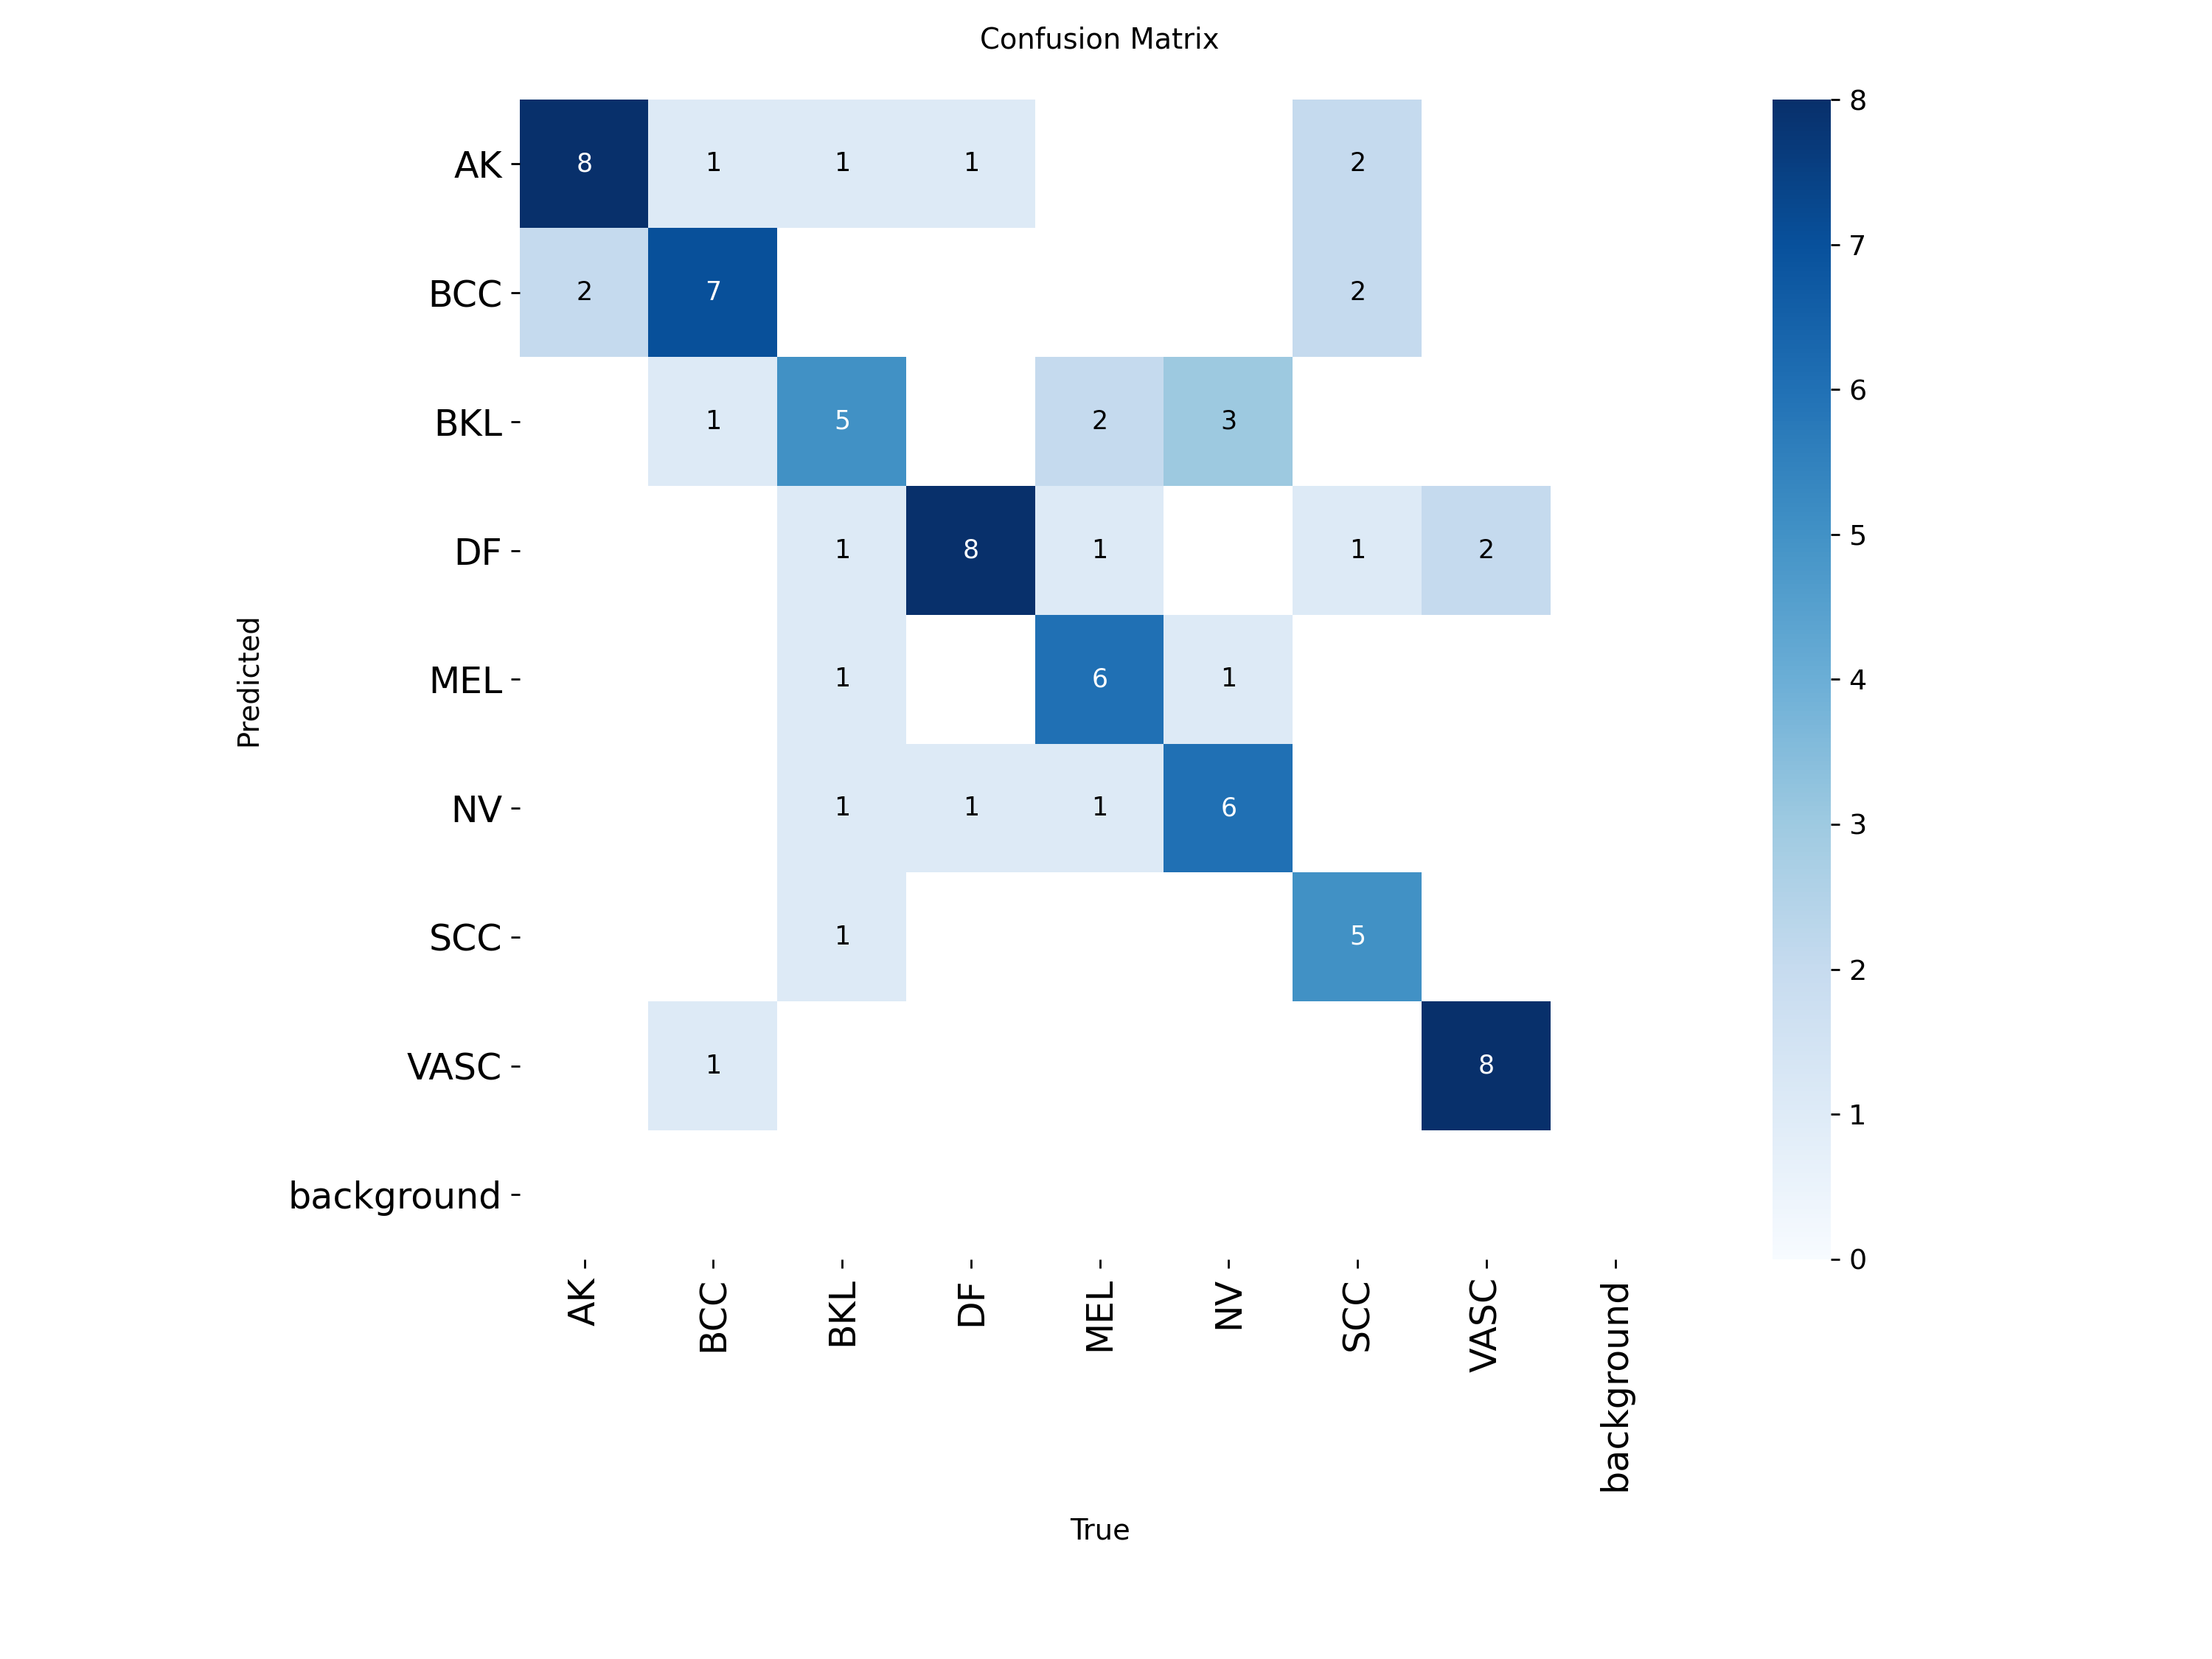


Matriz de Confusión para yolov8s_run:


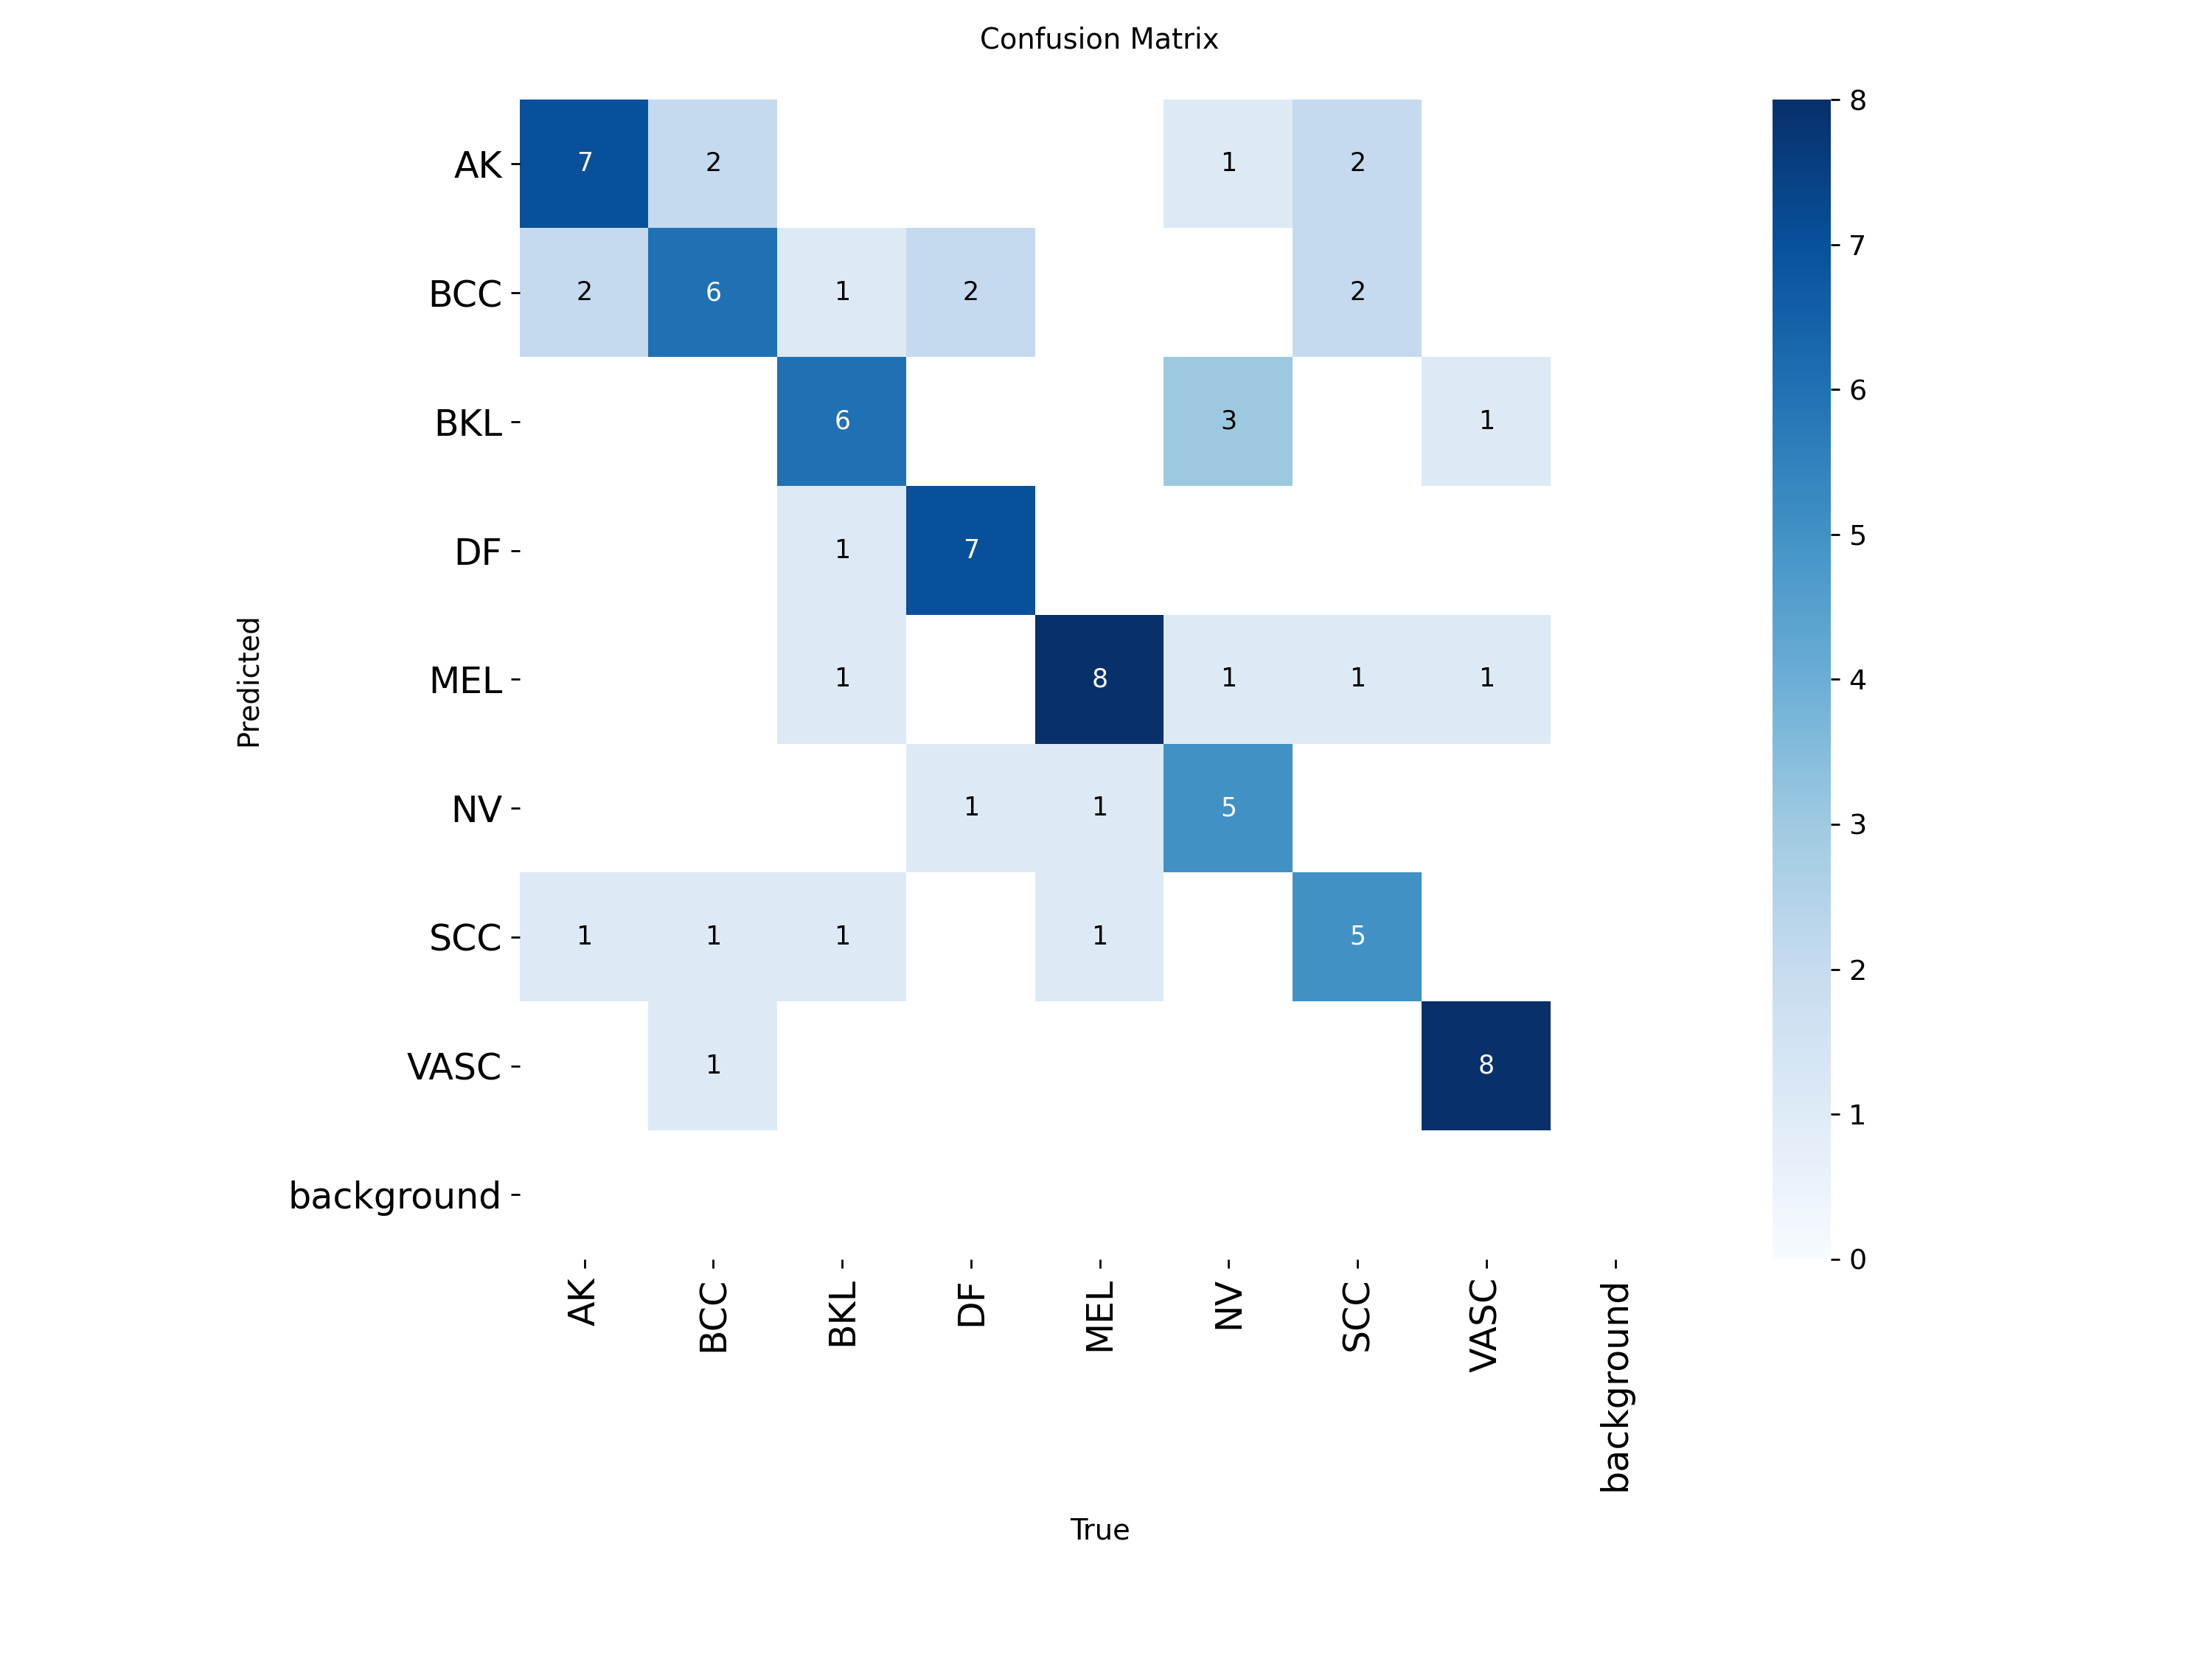


Matriz de Confusión para yolov8m_run:


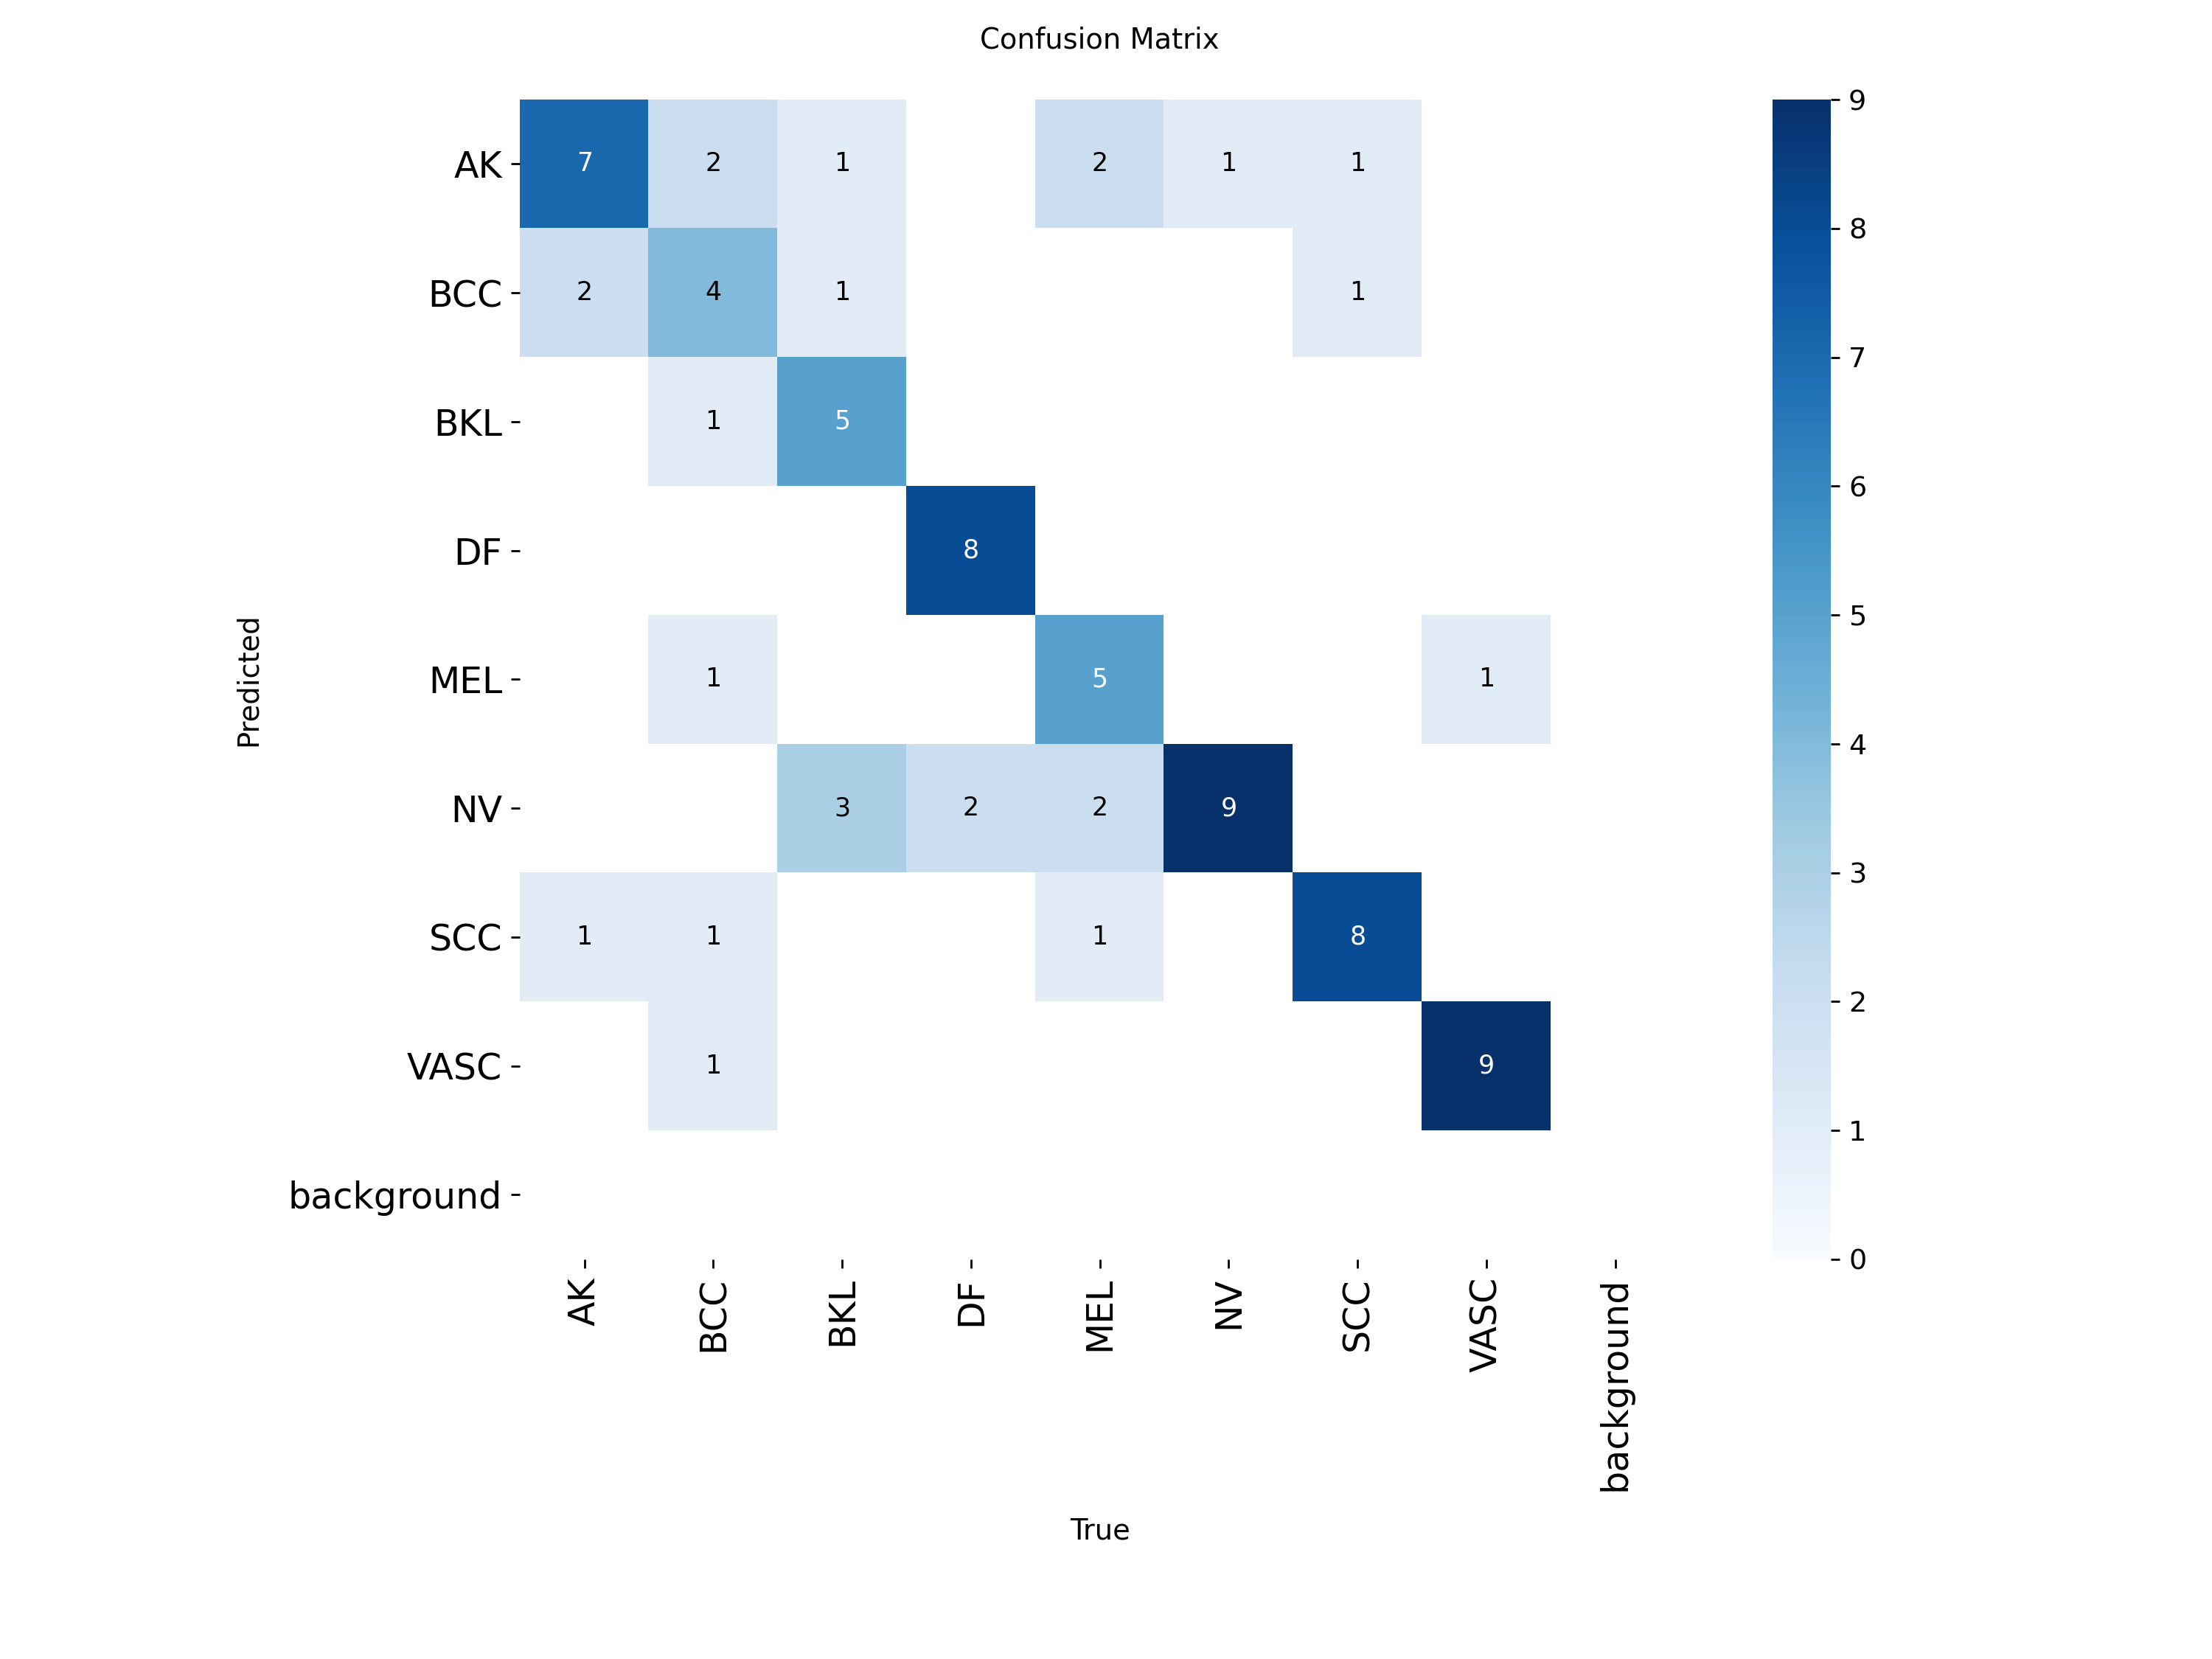

In [4]:
# 4. VISUALIZACIÓN DE MATRICES DE CONFUSIÓN
print("--- Visualización de Resultados ---")

import glob

# Buscamos las imágenes de matrices de confusión generadas
for run_name in model_names:
    search_path = os.path.join(eval_project, run_name, '*confusion_matrix.png')
    found_files = glob.glob(search_path)

    if found_files:
        print(f"\nMatriz de Confusión para {run_name}:")
        display(Image(filename=found_files[0], width=600))
    else:
        print(f"No se encontró gráfico para {run_name}")

#Celda 5: Empaquetar y Guardar (Salvar el progreso)
Guardamos los resultados de la evaluación (que contienen las matrices de confusión y los archivos CSV con las métricas detalladas) para usarlos en el informe final.

In [5]:
# 5. GUARDAR RESULTADOS DE EVALUACIÓN
print("--- Guardando resultados en Drive ---")

output_zip = 'evaluacion_resultados.zip'

# Comprimimos la carpeta de evaluación
!zip -r -q {output_zip} {eval_project}

# Movemos a Drive
dest_path = os.path.join(DRIVE_FOLDER, output_zip)
shutil.copy(output_zip, dest_path)

print(f"\n Evaluación guardada en: {dest_path}")

--- Guardando resultados en Drive ---

 Evaluación guardada en: /content/drive/MyDrive/Practica_ISIC/evaluacion_resultados.zip
